# Fitness chains: where to expand in Brussels

This is a project part of the _IBM Data Science: Applied Data Science Capstone_ course on Coursera.

## 1. Problem statement

Gym or health club chains are expanding around the world to increase the number of memberships, grow revenue and gain brand awareness and loyalty. As more and more gym chains are expanding internationally, an analysis of a city and its neighborhoods can help pick the best location for a new gym.

This project takes a closer look at the city of Brussels, and in which neighborhood a gym chain could best build its next gym. The same exercise can be performed in any city where a gym chain is looking to expand, or open a first branch. It could also be used to evaluate on a larger scale, such as for an entire country, or even Europe. The results could also be used for fitness and health related marketing campaigns, and which neighborhoods to target.

In order to come to a solution, we will look into the different neighborhoods in Brussels and gather info on the amount of gyms in the area, the population density, the age of the population, the unemployment rate, the health of the population and more. We aim to find a neighborhood where the amount of gyms are low, the population is relatively dense, the population is relatively young, the unemployment rate is low and the health index is low (meaning a healthy population) as we assume this would be an ideal situation for a new gym.

## 2. Description of the data

For the analysis, we will use the following data:
- Data about the neighborhoods in Brussels, along with information about their respective population, the area, the density of the population, the age of the population, the unemployment rate and the self-reported health, as found on https://wijkmonitoring.brussels/. We have downloaded one of the available data tables and have added it as a .csv file to the repository.
- Foursquare data for nearby gyms and fitness centres in every neighborhood.

We start with the neighborhoods in Brussels from the .csv file that can be found in the repository. The area is in square kilometers. The population density is given as the number of people per square kilometer. The columns from _18-29_ to _Not In Good Health_ are given as percentages. The last column, _Health Index_ is given as an index with values between 0 and 2. For easier processing, the units have been excluded from the columns names.

In [1]:
import pandas as pd

In [2]:
df_brussels = pd.read_csv("brussels_districts.csv")
df_brussels = df_brussels.drop(columns=["Code"])
df_brussels.head(10)

,Neighborhood,Municipality,Population,Area,Population Density,18-29,30-44,45-64,65+,Unemployment Rate,Not In Good Health,Health Index
0,Grote Markt,Brussel,3384,0.38664,8752.36,25,30.11,26.33,8.1,19.49,23.31,1.05
1,Dansaert,Brussel,9217,0.53287,17296.75,21.33,28.3,23.25,8.39,23.87,29.57,1.43
2,Begijnhof - Diksmuide,Brussel,6622,0.38468,17214.23,22.33,28.77,22.11,7.69,24.29,29.35,1.33
3,Martelaars,Brussel,2563,0.37540,6827.28,25.2,30.71,22.82,7.65,16.73,32.69,1.28
4,Onze-Lieve-Vrouw-ter-Sneeuw,Brussel,2468,0.29225,8444.84,24.96,33.35,20.66,6.16,20.19,21.94,1.1
5,Koningswijk,Brussel,330,0.70059,471.03,20.61,24.85,33.64,7.27,7.89,17.19,0.77
6,Zavel,Brussel,2732,0.46349,5894.41,18.23,27.64,28,12.7,18,23.9,1.07
7,Marollen,Brussel,12566,0.64377,19519.32,16,23.25,24.97,12.43,35.48,34.51,1.59
8,Stalingrad,Brussel,3708,0.24173,15339.21,23.33,28.86,20.06,10.49,28.22,30.02,1.29
9,Anneessens,Brussel,10043,0.44349,22645.2,20.21,25.47,21.13,7.39,31.37,27.5,1.52


In [3]:
df_brussels.tail()

,Neighborhood,Municipality,Population,Area,Population Density,18-29,30-44,45-64,65+,Unemployment Rate,Not In Good Health,Health Index
140,Marie-Josepark,Sint-Jans-Molenbeek,0,0.07855,VS,ND,ND,ND,ND,ND,ND,ND
141,Scheutbos,Sint-Jans-Molenbeek,89,0.45655,194.95,ND,ND,ND,ND,ND,ND,ND
142,Elisabethpark,Ganshoren - Koekelberg,2,0.23283,VS,ND,ND,ND,ND,ND,ND,ND
143,Laarbeekbos - Poelbos,Ganshoren - Jette,20,1.15277,17.35,ND,ND,ND,ND,ND,ND,ND
144,Boudewijnpark - Dielegembos,Jette,92,0.47429,194.01,ND,ND,ND,ND,ND,ND,ND


We remove the last rows from the dataset where the values are shown as "ND", and we change the data type from string to numeric (integer or float).

In [4]:
df_brussels = df_brussels[df_brussels["18-29"]!="ND"]

In [5]:
df_brussels[["Population","Area","Population Density","18-29","30-44","45-64","65+","Unemployment Rate","Not In Good Health","Health Index"]] = df_brussels[["Population","Area","Population Density","18-29","30-44","45-64","65+","Unemployment Rate","Not In Good Health","Health Index"]].apply(pd.to_numeric)

The _describe( )_ function allows us to have have a better understanding of the values in our dataset. We leave out the neighborhoods and municipalities.

In [6]:
df_brussels[["Population","Area","Population Density","18-29","30-44","45-64","65+","Unemployment Rate","Not In Good Health","Health Index"]].describe()

,Population,Area,Population Density,18-29,30-44,45-64,65+,Unemployment Rate,Not In Good Health,Health Index
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,10171.771186,1.019394,12350.327458,17.162203,23.494322,23.559831,13.716525,19.580763,26.578475,1.110847
std,4950.961047,0.592270,7053.829079,3.436886,4.748548,2.389984,5.220952,7.673365,4.954771,0.292746
min,330.000000,0.201650,335.000000,12.390000,13.000000,17.540000,6.160000,6.350000,14.150000,0.560000
25%,6382.500000,0.625725,6727.455000,14.637500,20.332500,21.905000,9.085000,13.940000,23.542500,0.890000
50%,9721.000000,0.836455,11582.075000,16.590000,23.690000,23.270000,12.680000,18.135000,27.225000,1.075000
75%,13859.500000,1.276397,17262.732500,18.420000,26.057500,24.675000,17.580000,24.255000,29.577500,1.290000
max,23645.000000,3.952180,37823.650000,33.700000,36.990000,33.640000,29.010000,38.940000,38.650000,1.770000


Next, we get the latitude and longitude of each neighborhood and add it to the dataframe. We use the OpenCage Geocoder API to look up the coordinates.

In [7]:
from opencage.geocoder import OpenCageGeocode
key = "hidden"
geocoder = OpenCageGeocode(key)

In [8]:
latitude = []
longitude = []

for index, row in df_brussels.iterrows(): #iterate over rows in df
    query = str(row["Neighborhood"]) + ", " + str(row["Municipality"]) + ", " + "Belgium"
    results = geocoder.geocode(query)
    lat = results[0]["geometry"]["lat"]
    lng = results[0]["geometry"]["lng"]
    latitude.append(lat)
    longitude.append(lng)

In [9]:
df_brussels["Latitude"] = latitude
df_brussels["Longitude"] = longitude

In [10]:
df_brussels.head(10)

,Neighborhood,Municipality,Population,Area,Population Density,18-29,30-44,45-64,65+,Unemployment Rate,Not In Good Health,Health Index,Latitude,Longitude
0,Grote Markt,Brussel,3384,0.38664,8752.36,25.00,30.11,26.33,8.10,19.49,23.31,1.05,50.846714,4.352514
1,Dansaert,Brussel,9217,0.53287,17296.75,21.33,28.30,23.25,8.39,23.87,29.57,1.43,50.850158,4.346255
2,Begijnhof - Diksmuide,Brussel,6622,0.38468,17214.23,22.33,28.77,22.11,7.69,24.29,29.35,1.33,50.850450,4.348780
3,Martelaars,Brussel,2563,0.37540,6827.28,25.20,30.71,22.82,7.65,16.73,32.69,1.28,50.851826,4.356570
4,Onze-Lieve-Vrouw-ter-Sneeuw,Brussel,2468,0.29225,8444.84,24.96,33.35,20.66,6.16,20.19,21.94,1.10,50.849895,4.366272
5,Koningswijk,Brussel,330,0.70059,471.03,20.61,24.85,33.64,7.27,7.89,17.19,0.77,50.842829,4.361245
6,Zavel,Brussel,2732,0.46349,5894.41,18.23,27.64,28.00,12.70,18.00,23.90,1.07,50.840382,4.356968
7,Marollen,Brussel,12566,0.64377,19519.32,16.00,23.25,24.97,12.43,35.48,34.51,1.59,50.838029,4.346676
8,Stalingrad,Brussel,3708,0.24173,15339.21,23.33,28.86,20.06,10.49,28.22,30.02,1.29,50.841684,4.344541
9,Anneessens,Brussel,10043,0.44349,22645.20,20.21,25.47,21.13,7.39,31.37,27.50,1.52,50.844301,4.345455


In [11]:
df_brussels.shape

(118, 14)

We can see that our dataset consists of 118 neighborhoods or districts in Brussels. Next, we gather info on the gyms and fitness centers in each neighborhood using the foursquare data. For security reasons, the _CLIENT_ID_ and _CLIENT_SECRET_ have been hidden.

In [12]:
CLIENT_ID = 'hidden' #Foursquare ID
CLIENT_SECRET = 'hidden' #Foursquare Secret
VERSION = '20180605' # Foursquare API version

We define a function to get nearby gyms in each neighborhood.

In [13]:
import requests

def getNearbyGyms(names, latitudes, longitudes, radius, limit=50, query="gym / fitness", intent="browse"):
    
    gyms_list = []
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}&intent={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            radius, 
            limit,
            query,
            intent)
        
        # make the GET request
        results = requests.get(url).json()["response"]["venues"]
        
        # return only relevant information for each gym
        gyms_list.append([(
            name,
            lat,
            lng,
            gym["name"],
            gym["location"]["lat"],
            gym["location"]["lng"]) for gym in results])
              
        nearby_gyms = pd.DataFrame([item for gym_list in gyms_list for item in gym_list])
        nearby_gyms.columns = ["Neighborhood",
                              "Neighborhood Latitude",
                              "Neighborhood Longitude",
                              "Gym Name",
                              "Gym Latitude",
                              "Gym Longitude"]
    
    return(nearby_gyms)

We can apply our previously defined function getNearbyGyms to the the neighborhoods in Brussels. This will return a dataframe with all gyms in an area with radius 1000m around the coordinates of each neighborhood.

In [14]:
brussels_gyms = getNearbyGyms(names = df_brussels["Neighborhood"],
                             latitudes = df_brussels["Latitude"],
                             longitudes = df_brussels["Longitude"],
                             radius = 1000,
                             )

In [15]:
brussels_gyms.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Gym Name,Gym Latitude,Gym Longitude
0,Grote Markt,50.846714,4.352514,Fitness Center,50.846055,4.355810
1,Grote Markt,50.846714,4.352514,The Urban Spa & Fitness @ The Hotel. Brussels,50.838320,4.355770
2,Grote Markt,50.846714,4.352514,Salle de Fitnesszaal,50.844527,4.350860
3,Grote Markt,50.846714,4.352514,Warwick fitness,50.845177,4.354448
4,Grote Markt,50.846714,4.352514,The Dominican GYM,50.849275,4.354894
5,Grote Markt,50.846714,4.352514,Gym @ Radisson Blu Royal Hotel,50.849001,4.356372
6,Grote Markt,50.846714,4.352514,Hilton Fitness,50.845697,4.356389
7,Grote Markt,50.846714,4.352514,Marriot Brussels Fitness Center,50.848736,4.349207
8,Grote Markt,50.846714,4.352514,Fitness CDP,50.843478,4.349890
9,Grote Markt,50.846714,4.352514,Elia Fitness Empereur,50.842985,4.353454


In [16]:
brussels_gyms.shape

(836, 6)

Our function has returned a total of 836 gyms in Brussels. This number seems quite high. One of the reasons would be that with a radius of 1000m, one gym can appear multiple times in our dataset as it is accessible from different neighborhoods. Another reason that we can see from the first five rows is that Foursquare has also returned hotel gyms. As these are generally only accessible to hotel guests, we will aim to exclude them from our dataset by filtering out any gym names that contain "Hotel" or hotel brands such as "Marriott", "Hilton", "Sofitel", etc. This method is not perfect, and some hotel gyms will likely remain in our data set.

In [17]:
brussels_gyms = brussels_gyms[~brussels_gyms["Gym Name"].str.contains("Hotel")]
brussels_gyms = brussels_gyms[~brussels_gyms["Gym Name"].str.contains("Marriott")]
brussels_gyms = brussels_gyms[~brussels_gyms["Gym Name"].str.contains("Marriot")]
brussels_gyms = brussels_gyms[~brussels_gyms["Gym Name"].str.contains("Hilton")]
brussels_gyms = brussels_gyms[~brussels_gyms["Gym Name"].str.contains("Novotel")]
brussels_gyms = brussels_gyms[~brussels_gyms["Gym Name"].str.contains("Sofitel")]
brussels_gyms = brussels_gyms[~brussels_gyms["Gym Name"].str.contains("Radisson")]
brussels_gyms = brussels_gyms[~brussels_gyms["Gym Name"].str.contains("Warwick")]
brussels_gyms = brussels_gyms[~brussels_gyms["Gym Name"].str.contains("Dominican")]
brussels_gyms = brussels_gyms[~brussels_gyms["Gym Name"].str.contains("Crowne Plaza")]
brussels_gyms = brussels_gyms[~brussels_gyms["Gym Name"].str.contains("Steigenberger")]
brussels_gyms = brussels_gyms[~brussels_gyms["Gym Name"].str.contains("Holiday Inn")]

In [18]:
brussels_gyms.shape

(644, 6)

We now have 644 gyms left in our dataset. We can look at the number of gyms per neighborhood by grouping the dataset by neighborhood and using the _count( )_ function.

In [19]:
gyms_grouped = brussels_gyms.groupby("Neighborhood").count().sort_values(by="Gym Name",ascending=False)
gyms_grouped = gyms_grouped.drop(columns=["Neighborhood Latitude", "Neighborhood Longitude", "Gym Latitude", "Gym Longitude"])
gyms_grouped.rename(columns={"Gym Name":"Gym Count"},inplace=True)
gyms_grouped.head(10)

,Gym Count
Neighborhood,
Koningswijk,19
Martelaars,18
Zavel,14
Marollen,14
Squares,13
Oud Laken West,13
Oud Laken Oost,13
Onze-Lieve-Vrouw-ter-Sneeuw,13
Begijnhof - Diksmuide,13


## 3. Methodology

Each row in our dataframe _df_brussels_ represents a neighborhood. We can start our analysis by showing the 118 neighborhoods on a map of Brussels using the folium package. In order to see the map, this notebook will need to be downloaded and viewed in Jupyter Notebook rather than in Github. Alternatively, screenshots of the maps can be consulted in the report.

In [20]:
import numpy as np
import json
import folium

In [21]:
bru_lat = df_brussels.at[0,"Latitude"]
bru_lng = df_brussels.at[0,"Longitude"]

In [22]:
map_brussels = folium.Map(location=[bru_lat, bru_lng], zoom_start=12)

for lat, lng, label in zip(df_brussels['Latitude'],df_brussels['Longitude'],df_brussels['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='white',
        parse_html=False
    ).add_to(map_brussels)
    
map_brussels

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt

We can start analysing our dataset with a simple bar chart of the neighborhoods with the highest number of gyms. These will most likely not be interesting for expansion of our gym chain.

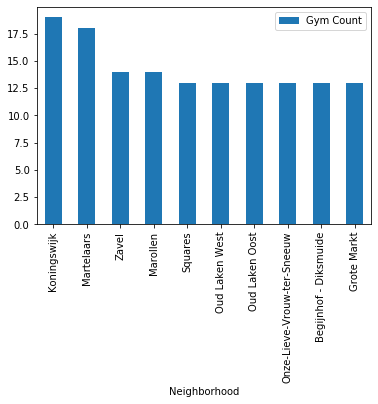

In [24]:
gyms_grouped.sort_values(by="Gym Count",ascending=False).head(10).plot.bar(y="Gym Count")

Next, we can have a look at the neighborhoods that have less than three gyms in the area.

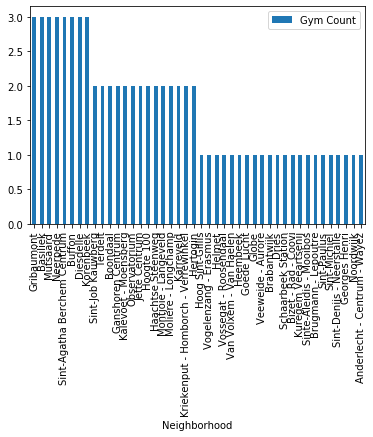

In [25]:
gyms_grouped[gyms_grouped["Gym Count"] <= 3].plot.bar(y="Gym Count")

There seem to be a large number of neighborhoods with three or less gyms in the area, so we will need to include more variables to decide which neighborhoods are good options for expansion. Therefore, we will try to cluster the neighborhoods based on the amount of gyms, the age of the population, the unemployment rate and the self-reported health of the population.

In [26]:
df_brussels = df_brussels.merge(gyms_grouped,how="left",on="Neighborhood")
df_brussels["45+"] = df_brussels["45-64"] + df_brussels["65+"]
df_brussels.head()

,Neighborhood,Municipality,Population,Area,Population Density,18-29,30-44,45-64,65+,Unemployment Rate,Not In Good Health,Health Index,Latitude,Longitude,Gym Count,45+
0,Grote Markt,Brussel,3384,0.38664,8752.36,25.00,30.11,26.33,8.10,19.49,23.31,1.05,50.846714,4.352514,13.0,34.43
1,Dansaert,Brussel,9217,0.53287,17296.75,21.33,28.30,23.25,8.39,23.87,29.57,1.43,50.850158,4.346255,11.0,31.64
2,Begijnhof - Diksmuide,Brussel,6622,0.38468,17214.23,22.33,28.77,22.11,7.69,24.29,29.35,1.33,50.850450,4.348780,13.0,29.80
3,Martelaars,Brussel,2563,0.37540,6827.28,25.20,30.71,22.82,7.65,16.73,32.69,1.28,50.851826,4.356570,18.0,30.47
4,Onze-Lieve-Vrouw-ter-Sneeuw,Brussel,2468,0.29225,8444.84,24.96,33.35,20.66,6.16,20.19,21.94,1.10,50.849895,4.366272,13.0,26.82


For the clustering of our neighborhoods, we keep the variables that matter most.

In [27]:
df_brussels_cluster = df_brussels[["Neighborhood","Population Density","18-29","30-44","45+","Unemployment Rate","Health Index","Gym Count"]]
df_brussels_cluster

,Neighborhood,Population Density,18-29,30-44,45+,Unemployment Rate,Health Index,Gym Count
0,Grote Markt,8752.36,25.00,30.11,34.43,19.49,1.05,13.0
1,Dansaert,17296.75,21.33,28.30,31.64,23.87,1.43,11.0
2,Begijnhof - Diksmuide,17214.23,22.33,28.77,29.80,24.29,1.33,13.0
3,Martelaars,6827.28,25.20,30.71,30.47,16.73,1.28,18.0
4,Onze-Lieve-Vrouw-ter-Sneeuw,8444.84,24.96,33.35,26.82,20.19,1.10,13.0
...,...,...,...,...,...,...,...,...
113,Dieweg,5565.47,12.39,18.21,45.95,11.04,0.76,5.0
114,Kalevoet - Moensberg,5511.16,14.67,19.67,43.06,14.63,1.05,2.0
115,Globe,10797.48,16.57,23.30,40.42,15.76,0.91,1.0
116,Vossegat - Roosendaal,7874.13,12.79,19.28,48.18,14.57,0.87,1.0


Before applying the _KMeans_ clustering method, we should normalize the data.

In [28]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df_brussels_cluster.drop(columns = "Neighborhood"))
x = scaler.transform(df_brussels_cluster.drop(columns = "Neighborhood"))
x = np.nan_to_num(x)

Now we can try to cluster the data.

In [29]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(x)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:118] 

array([2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       1, 1, 1, 3, 3, 3, 1, 1, 1, 0, 0, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1], dtype=int32)

We have randomly chosen to find four clusters. We can use the _elbow method_ to see if a different number of methods _k_ would be beter.

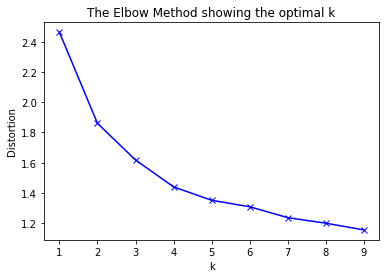

In [30]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

While the difference in distortion looks bigger with k=2, the distortion still significantly decreases between k=2 and k=4. Therefore, we will go ahead with four clusters. We can insert the cluster labels back into our _df_brussels_ dataframe.

In [31]:
df_brussels.insert(0,"Cluster Labels",kmeans.labels_)

In [32]:
df_brussels.head()

,Cluster Labels,Neighborhood,Municipality,Population,Area,Population Density,18-29,30-44,45-64,65+,Unemployment Rate,Not In Good Health,Health Index,Latitude,Longitude,Gym Count,45+
0,2,Grote Markt,Brussel,3384,0.38664,8752.36,25.00,30.11,26.33,8.10,19.49,23.31,1.05,50.846714,4.352514,13.0,34.43
1,2,Dansaert,Brussel,9217,0.53287,17296.75,21.33,28.30,23.25,8.39,23.87,29.57,1.43,50.850158,4.346255,11.0,31.64
2,2,Begijnhof - Diksmuide,Brussel,6622,0.38468,17214.23,22.33,28.77,22.11,7.69,24.29,29.35,1.33,50.850450,4.348780,13.0,29.80
3,2,Martelaars,Brussel,2563,0.37540,6827.28,25.20,30.71,22.82,7.65,16.73,32.69,1.28,50.851826,4.356570,18.0,30.47
4,2,Onze-Lieve-Vrouw-ter-Sneeuw,Brussel,2468,0.29225,8444.84,24.96,33.35,20.66,6.16,20.19,21.94,1.10,50.849895,4.366272,13.0,26.82


Now that we have defined the four clusters, we can see what they look like on the map of Brussels.

In [33]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [34]:
# create map
map_clusters = folium.Map(location=[bru_lat, bru_lng], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, nb, cluster in zip(df_brussels['Latitude'], df_brussels['Longitude'], df_brussels['Neighborhood'], df_brussels['Cluster Labels']):
    label = folium.Popup(str(nb) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color="black",
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

## 4. Results

We can have a closer look at each cluster with descriptive statistics to see which cluster would be best for opening a new gym. First, we get the different clusters from our dataframe and assign them to new variables.

In [35]:
cluster0 = df_brussels.loc[df_brussels['Cluster Labels'] == 0, df_brussels.columns[[1] + list(range(3,12)) + [15]]]
cluster1 = df_brussels.loc[df_brussels['Cluster Labels'] == 1, df_brussels.columns[[1] + list(range(3,12)) + [15]]]
cluster2 = df_brussels.loc[df_brussels['Cluster Labels'] == 2, df_brussels.columns[[1] + list(range(3,12)) + [15]]]
cluster3 = df_brussels.loc[df_brussels['Cluster Labels'] == 3, df_brussels.columns[[1] + list(range(3,12)) + [15]]]

For comparison, we can show the descriptive statistics for the entire dataset again, this time including the total number of gyms.

In [36]:
df_brussels[["Population","Area","Population Density","18-29","30-44","45-64","65+","Unemployment Rate","Not In Good Health","Gym Count"]].describe()

,Population,Area,Population Density,18-29,30-44,45-64,65+,Unemployment Rate,Not In Good Health,Gym Count
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,116.000000
mean,10171.771186,1.019394,12350.327458,17.162203,23.494322,23.559831,13.716525,19.580763,26.578475,5.551724
std,4950.961047,0.592270,7053.829079,3.436886,4.748548,2.389984,5.220952,7.673365,4.954771,4.330568
min,330.000000,0.201650,335.000000,12.390000,13.000000,17.540000,6.160000,6.350000,14.150000,1.000000
25%,6382.500000,0.625725,6727.455000,14.637500,20.332500,21.905000,9.085000,13.940000,23.542500,2.000000
50%,9721.000000,0.836455,11582.075000,16.590000,23.690000,23.270000,12.680000,18.135000,27.225000,4.000000
75%,13859.500000,1.276397,17262.732500,18.420000,26.057500,24.675000,17.580000,24.255000,29.577500,8.000000
max,23645.000000,3.952180,37823.650000,33.700000,36.990000,33.640000,29.010000,38.940000,38.650000,19.000000


Now, we can compare each cluster.

In [37]:
cluster0.describe()

,Population,Area,Population Density,18-29,30-44,45-64,65+,Unemployment Rate,Not In Good Health,Gym Count
count,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,34.000000
mean,7612.00000,1.529823,5656.296286,14.767714,18.767714,25.595429,19.917429,13.494000,23.647429,3.823529
std,3730.89334,0.674536,2892.277823,1.941816,2.938538,1.757840,3.288477,5.376662,5.246085,2.152808
min,1324.00000,0.652950,335.000000,12.390000,13.000000,21.280000,14.240000,6.350000,14.150000,1.000000
25%,5313.50000,1.048330,3472.595000,13.480000,17.145000,24.230000,17.560000,10.485000,19.650000,2.000000
50%,6845.00000,1.387610,5669.560000,14.540000,19.030000,25.870000,19.250000,12.050000,23.660000,4.000000
75%,10685.50000,1.843735,6864.925000,15.320000,20.595000,26.715000,22.690000,14.825000,26.030000,5.000000
max,15327.00000,3.952180,11697.830000,20.800000,24.660000,29.350000,29.010000,36.000000,38.650000,9.000000


The first cluster, cluster 0, has 35 neighborhoods in it. They are the furthest from the city center, have low population density compared to the average, a larger share of people aged over 45, a low unemployment rate and relatively good health. The average number of gyms is 3.82, which is quite high taking into account the low population density.

In [38]:
cluster1.describe()

,Population,Area,Population Density,18-29,30-44,45-64,65+,Unemployment Rate,Not In Good Health,Gym Count
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,37.000000
mean,11843.789474,0.974534,12961.558158,16.026842,23.385526,23.345000,13.826316,18.284211,27.987895,3.216216
std,4660.973203,0.425960,4389.011625,1.879516,2.964589,1.230198,2.578467,3.631086,4.437739,2.123089
min,1722.000000,0.300710,3106.520000,13.200000,16.550000,21.620000,8.040000,10.910000,17.520000,1.000000
25%,8610.250000,0.683925,9760.887500,14.592500,21.595000,22.525000,11.870000,15.800000,26.037500,1.000000
50%,12262.000000,0.881580,13096.110000,16.100000,23.045000,23.195000,13.400000,17.865000,28.190000,3.000000
75%,15208.500000,1.204308,16797.105000,16.897500,24.947500,23.930000,15.682500,20.777500,30.215000,4.000000
max,23645.000000,1.937560,20321.920000,21.570000,31.160000,28.750000,19.040000,26.140000,38.440000,8.000000


Cluster 1 has a total of 38 neighborhoods. The map shows us that these neighborhoods are closer to the center than Cluster 0, but still quite far. They have an average of 3.22 gyms in the area. Their population and population density is slightly higher than the average in Brussels. The percentage of people aged between 18 and 44 is slightly lower than the average in Brussels. The unemployment rate is also slightly lower than the average. Last, the health index shows that the self-reported health in these areas is slightly worse than on average.

In [39]:
cluster2.describe()

,Population,Area,Population Density,18-29,30-44,45-64,65+,Unemployment Rate,Not In Good Health,Gym Count
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,7952.333333,0.618810,13085.992381,22.615714,30.270952,22.743333,9.226190,19.022857,24.668095,12.142857
std,4757.615341,0.262539,5782.505552,3.224008,3.081576,3.317784,2.254756,4.788368,3.678505,2.833473
min,330.000000,0.241730,471.030000,18.230000,24.850000,17.540000,6.160000,7.890000,17.190000,6.000000
25%,3384.000000,0.431490,8752.360000,20.790000,28.300000,20.950000,7.690000,16.730000,22.000000,11.000000
50%,8827.000000,0.544550,15128.050000,22.330000,30.100000,22.080000,9.100000,19.490000,24.260000,12.000000
75%,10218.000000,0.805010,17214.230000,23.670000,32.810000,23.030000,10.400000,22.230000,26.700000,13.000000
max,18142.000000,1.246150,21254.640000,33.700000,36.990000,33.640000,15.430000,28.220000,32.690000,19.000000


Cluster 2 has 21 neighborhoods located in the center of the city. They have a high number of gyms in the area. The average population per neighborhood is quite small, but the neighborhoods seem to be smaller as well, leading to an above average population density. These neighborhoods have the largest share of people aged 18 to 44, and the unemployment rate is around the average of Brussels. Furthermore, the reported health is relatively good.

In [40]:
cluster3.describe()

,Population,Area,Population Density,18-29,30-44,45-64,65+,Unemployment Rate,Not In Good Health,Gym Count
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,13199.416667,0.696559,20500.967500,17.680000,24.630000,21.645833,8.428750,30.998333,30.292917,5.833333
std,4564.117458,0.323928,6485.077643,1.226231,1.500597,1.292022,1.200458,4.491269,2.582241,4.488310
min,5458.000000,0.201650,8738.200000,15.040000,20.630000,19.750000,6.590000,21.460000,26.680000,1.000000
25%,9513.250000,0.512145,17135.340000,17.132500,23.857500,20.865000,7.620000,29.122500,28.725000,1.750000
50%,13308.000000,0.676710,20193.660000,17.680000,24.415000,21.475000,8.505000,31.365000,29.495000,4.000000
75%,17999.000000,0.778443,24808.275000,18.215000,25.720000,22.055000,8.997500,33.495000,31.145000,10.000000
max,19390.000000,1.737760,37823.650000,20.210000,27.360000,24.970000,12.430000,38.940000,37.250000,14.000000


Cluster 3, the last cluster, has a total of 24 neighborhoods and is located on the outsides of the center. They have more gyms Brussels on average. While the population is a only a bit higher than the average, the population density is significantly higher. They have a larger share of people aged 18 to 44, but the unemployment rate is almost double. Additionally, they have a slightly larger share of people that are not in good health.

## 5. Discussion

Based on the clustering of the 118 neighborhoods in Brussels, we would say that the neighborhoods in municipalities away from the center but with high population density are the most interesting for opening a new fitness center. The neighborhoods in this cluster are grouped together, and while their populations are higher than on average, the number of gyms here are significantly lower than on average. They seem to have a good share of the targeted age group for gyms, between 18 and 44, an unemployment rate that is lower than on average, and a self-reported health that is better than average.

Neighborhoods that are closer to the center, on the outsides, are less interesting as they have significantly more gyms while the population is only slightly bigger.

Neighborhoods in municipalities that are too far away from the center are even less interesting. They have an older population and a low population density, which makes it unattractive for opening a new fitness center.

Last, the neighborhoods in the center seem attractive when only looking at the population. But as they already have too many gyms within a radius of one km, they become less attractive for a new fitness center as well.

The analysis in this project could be improved by including each gym's score and the number of check-ins. This would allow us to see the popularity of gyms in each neighborhood. Neighborhoods with lower popularity would be more interesting than neighborhoods with higher popularity. But as _score_ and _stats_ are part of _Venue Details_ , which is a premium endpoint, we will not be able to do this here.

## 6. Conclusion

We conclude that with location, population and venue data we can make recommendations on where a fitness chain may want to open a new fitness center. The recommended areas are away from the center - although not too far - where the population and population densities are high, and the number of gyms are low. Additionally, these areas seem to have an attractive age group, a lower unemployment rate and a better self-reported health.

The analysis done for this project can be performed on a larger scale, for example in the case of international expansion. Cities and neighborhoods with attractive characteristics for opening a new fitness center can be located for further research into expansion.